<a href="https://colab.research.google.com/github/Khawaritzmi/Mk.-Data-Mining-2021/blob/main/Data_Mining_Pertemuan_5_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing Data Tidak Terstruktur

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Data Citra

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [ ]:
img = cv.imread('/content/drive/MyDrive/Datasets/imagewoof/Shih-Tzu/n02086240_10.JPEG')

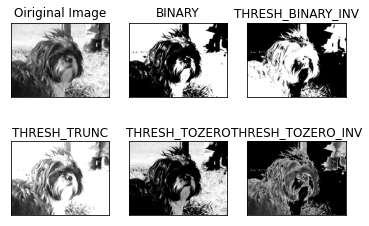

In [ ]:
gray_image = cv.imread('/content/drive/MyDrive/Datasets/imagewoof/Shih-Tzu/n02086240_10.JPEG',0)

ret,thresh_binary = cv.threshold(gray_image,127,255,cv.THRESH_BINARY)
ret,thresh_binary_inv = cv.threshold(gray_image,127,255,cv.THRESH_BINARY_INV)
ret,thresh_trunc = cv.threshold(gray_image,127,255,cv.THRESH_TRUNC)
ret,thresh_tozero = cv.threshold(gray_image,127,255,cv.THRESH_TOZERO)
ret,thresh_tozero_inv = cv.threshold(gray_image,127,255,cv.THRESH_TOZERO_INV)

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

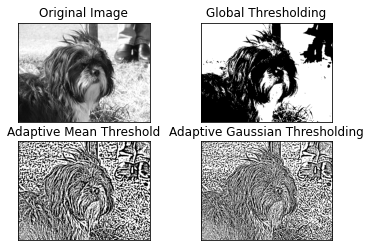

In [ ]:
ret,thresh_global = cv.threshold(gray_image,127,255,cv.THRESH_BINARY)
#here 11 is the pixel neighbourhood that is used to calculate the threshold value
thresh_mean = cv.adaptiveThreshold(gray_image,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)

thresh_gaussian = cv.adaptiveThreshold(gray_image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']
images = [gray_image,thresh_global,thresh_mean,thresh_gaussian]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

# 2. Data Text


2.1. Tokenisasi dengan library TF

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words= 15, oov_token='-')

In [ ]:
teks = ['Saya suka programming',
        'Programming sangat menyenangkan!',
        'Machine Learning berbeda dengan pemrograman konvensional']

In [ ]:
tokenizer.fit_on_texts(teks)

In [ ]:
sequences = tokenizer.texts_to_sequences(teks)

In [ ]:
print(tokenizer.word_index)

{'-': 1, 'programming': 2, 'saya': 3, 'suka': 4, 'sangat': 5, 'menyenangkan': 6, 'machine': 7, 'learning': 8, 'berbeda': 9, 'dengan': 10, 'pemrograman': 11, 'konvensional': 12}


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences_samapanjang = pad_sequences(sequences)

In [ ]:
print(sequences_samapanjang)

[[ 0  0  0  3  4  2]
 [ 0  0  0  2  5  6]
 [ 7  8  9 10 11 12]]


In [ ]:
sequences_samapanjang = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=5)

In [ ]:
print(sequences_samapanjang)

[[ 3  4  2  0  0]
 [ 2  5  6  0  0]
 [ 8  9 10 11 12]]


In [ ]:
sequences_samapanjang = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=5,
                                      truncating='post')

In [ ]:
print(sequences_samapanjang)

[[ 3  4  2  0  0]
 [ 2  5  6  0  0]
 [ 7  8  9 10 11]]


2.2. Tokenisasi menggunakan NLTK

In [ ]:
# Installing Modules for Google Colab
!pip install unidecode
!pip install pyLDAvis
!pip install textblob
!pip install sastrawi
!pip install twython
!pip install tweepy
!pip install spacy
!pip install python-crfsuite
!python -m spacy download en
!python -m spacy download xx
!python -m spacy download en_core_web_sm
import nltk
nltk.download('popular')

     |████████████████████████████████| 235 kB 4.2 MB/s 
     |████████████████████████████████| 1.7 MB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 192 kB/s 
     |████████████████████████████████| 11.3 MB 27.5 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=1bc629d88d43fcb63d8eaed99de72d30e025a33af77c79c6cdd153d8f291ae29
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERR

     |████████████████████████████████| 209 kB 4.3 MB/s 
     |████████████████████████████████| 743 kB 4.0 MB/s 
     |████████████████████████████████| 12.0 MB 526 kB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
     |████████████████████████████████| 3.7 MB 4.2 MB/s 
  Created wheel for xx-ent-wiki-sm: filename=xx_ent_wiki_sm-2.2.0-py3-none-any.whl size=3732134 sha256=5980a3c0cf1be7d10db450830d11bc3123be99a68697d1a76913065869463012
  Stored in directory: /tmp/pip-ephem-wheel-cache-aptxcox6/wheels/87/31/20/7f7576bcd0b6ee9c7056c60e28d9e6a40143c553cb5fecc9e2
Successfully built xx-ent-wiki-sm
✔ Download and installation successful
You can now load the model via spacy.load('xx_ent_wiki_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/xx_en

True

In [ ]:
T = "Hello, Mr. Man. He smiled!! This, i.e. that, is it."
Word_Tokens = nltk.word_tokenize(T)
print(Word_Tokens) # tokenisasi kata

['Hello', ',', 'Mr.', 'Man', '.', 'He', 'smiled', '!', '!', 'This', ',', 'i.e', '.', 'that', ',', 'is', 'it', '.']


In [ ]:
# Bandingkan jika menggunakan fungsi split di Python, apakah bedanya? 
print(T.split())
# Apakah kesimpulan yang bisa kita tarik?

['Hello,', 'Mr.', 'Man.', 'He', 'smiled!!', 'This,', 'i.e.', 'that,', 'is', 'it.']


In [ ]:
Sentence_Tokens = nltk.sent_tokenize(T)
print(Sentence_Tokens) # Tokenisasi kalimat
# Perhatikan hasilnya, ada berapa kalimat yang di deteksi? setuju?

['Hello, Mr. Man.', 'He smiled!!', 'This, i.e.', 'that, is it.']


In [ ]:
T = "how are you\n are you okay?"
print(T)
Sentence_Tokens = nltk.sent_tokenize(T)
print(Sentence_Tokens)

how are you
 are you okay?
['how are you\n are you okay?']


2.3. Tokenisasi menggunakan Spacy

In [ ]:
# Contoh Tokenisasi dalam bahasa Indonesia dengan Spacy
from spacy.lang.id import Indonesian
nlp_id = Indonesian()  # Language Model

teks = 'Sore itu, Hamzah melihat kupu-kupu di taman. Ibu membeli oleh-oleh di pasar'
tokenS_id = nlp_id(teks)
#T = []
#for token in tokenS_id:
#    T.append(token)
print([t for t in tokenS_id])

[Sore, itu, ,, Hamzah, melihat, kupu-kupu, di, taman, ., Ibu, membeli, oleh-oleh, di, pasar]


In [ ]:
# Jika menggunakan Language model English:
from spacy.lang.en import English
nlp_en = English()
tokenS_en = nlp_en(teks)
print([token.text for token in tokenS_en])

['Sore', 'itu', ',', 'Hamzah', 'melihat', 'kupu', '-', 'kupu', 'di', 'taman', '.', 'Ibu', 'membeli', 'oleh', '-', 'oleh', 'di', 'pasar']


# 3. Data Audio


In [ ]:
import librosa
audio_data = '/content/drive/MyDrive/dataset/disco.00000.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))#<class 'numpy.ndarray'> <class 'int'>print(x.shape, sr)#(94316,) 22050

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
librosa.load(audio_data, sr=44100)

(array([-0.2260893 , -0.26491925, -0.23751618, ..., -0.134322  ,
        -0.10339258, -0.05058173], dtype=float32), 44100)

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_data)

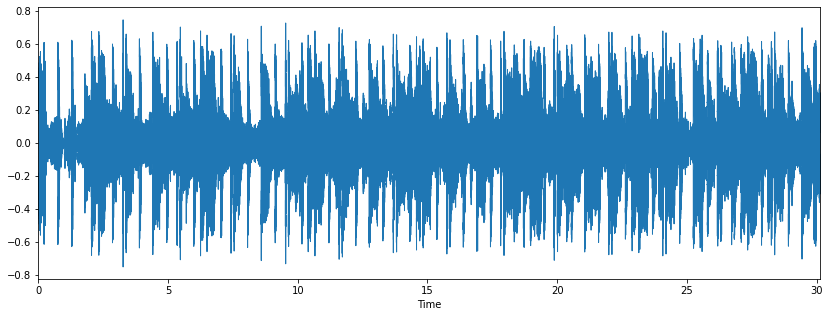

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

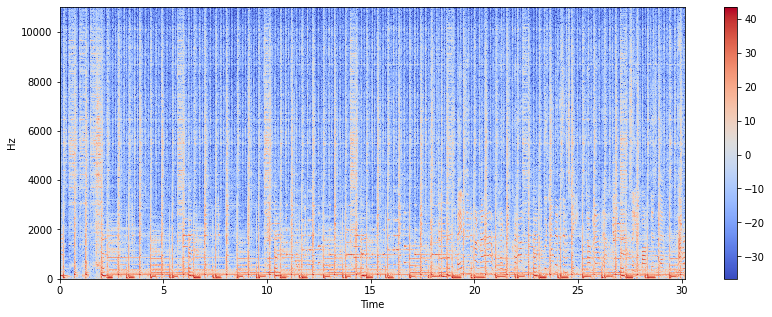

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

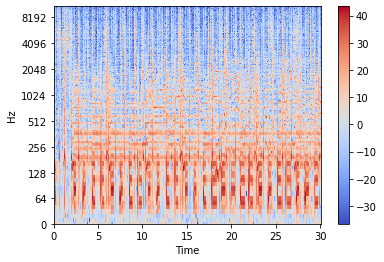

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array
#Saving the audio
librosa.output.write_wav('tone_220.wav', x, sr)

In [ ]:
import soundfile as sf
sf.write('stereo_file1.wav', reduced_noise, 48000, 'PCM_24')

Spectral Centroid (SC) mengukur posisi dan bentuk spektral dari titik keseimbangan distribusi energi. Secara sederhana spectral centroid disebut gravitasi dari spektrum.

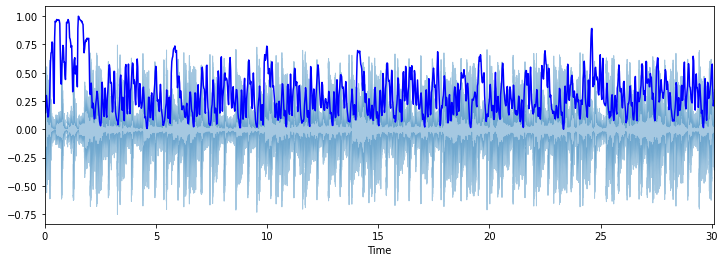

In [ ]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

Spectral Rolloff (SR) Yaitu menentukan nilai frekuensi yang terletak dibawah nilai distribusi spektrum (biasanya bernilai 90%) terkonsentrasi. C, parameter persentase.

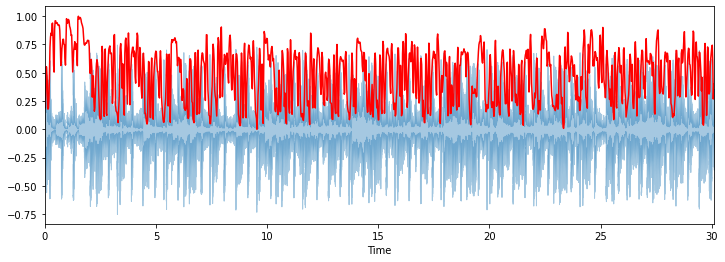

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

The spectral bandwidth is defined as the width of the band of light at one-half the peak maximum (or full width at half maximum [FWHM]) and is represented by the two vertical red lines and λSB on the wavelength axis.

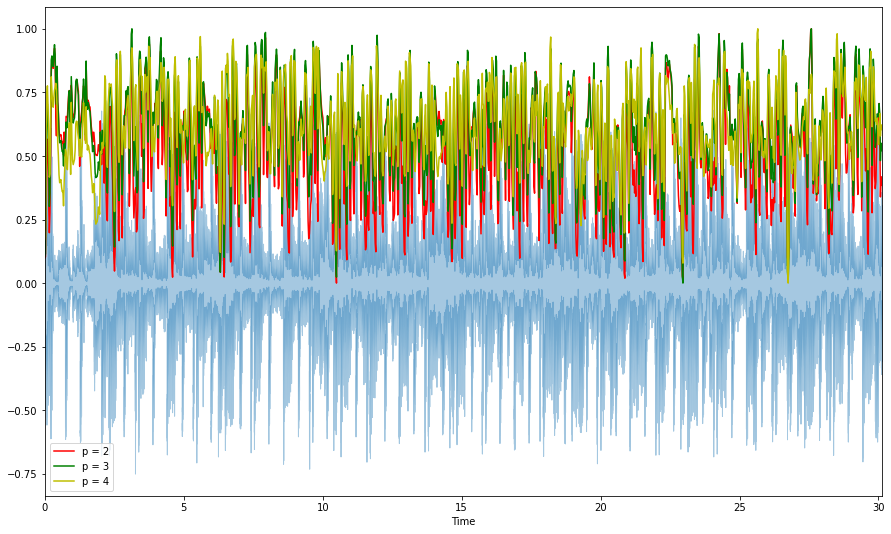

In [ ]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

Zero-Crossing Rate

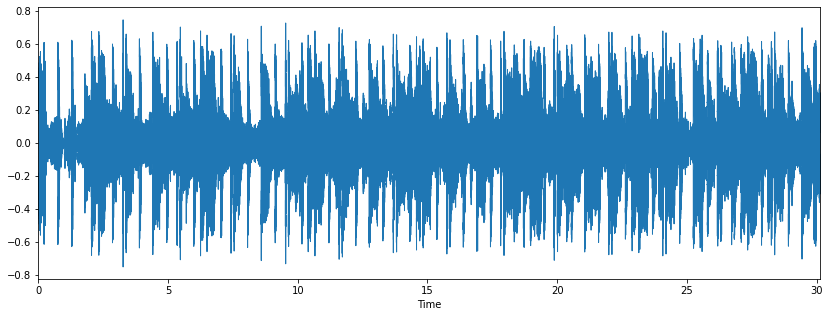

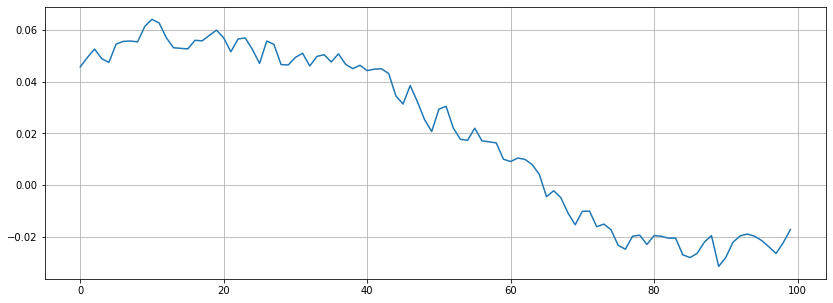

In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/dataset/disco.00000.wav')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

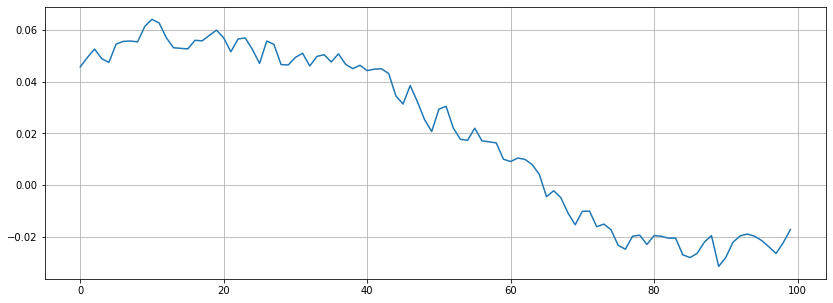

In [ ]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [ ]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))#16

1


Mel-Frequency Cepstrum Coefficients (MFCC) adalah salah satu bentuk representasi cepstral dari sinyal dimana frekuensi didistribusi berdasarkan skala mel bukan secara pendekatan linear.

(20, 1298)


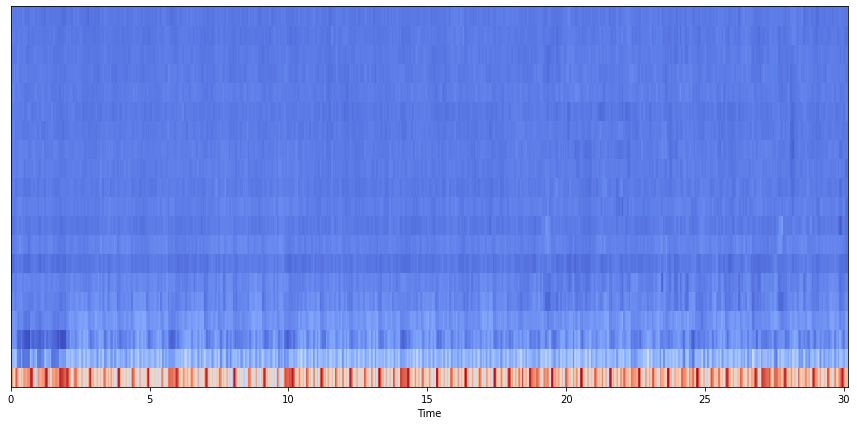

In [ ]:
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

Chroma feature

In [ ]:
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')